# VC. Exercise 3.1 - Harris Method

### Harris method to detect the corners of the squares that compose the chesboard figure 

#### Authors: Jorge Lorenzo, Luis Ruanova and Rodrigo Linares

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


The numer of squares is =  56
Average sizes: X = 80.69, Y = 80.43


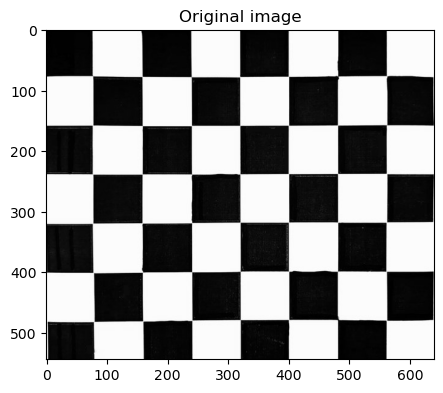

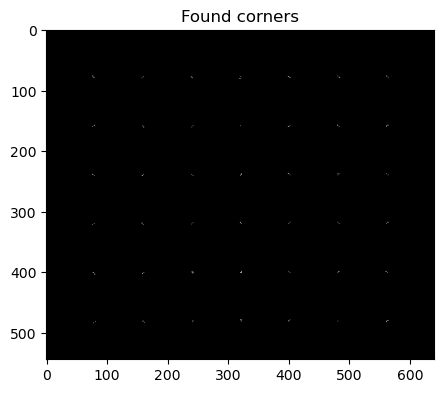

In [8]:
def import_image(image_name):
    
    """ Load the image, transform it to grayscale float32 and get its dimensions. """
    
    img = cv2.imread(image_name)
    
    # Transform to gray scale and to flaot32
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    height, width = gray.shape
        
    return gray, height, width, img


def find_corners(grayscale_image):
    
    """ From the grayscale image runs the cornerHarris() method and converts its output to binary. """
    
    # Detect the corners using the Harris corner detection method
    gray = np.float32(grayscale_image)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
        
    # Convert the resulting image to a binary one
    threshold_BW = 100000000
    ret, binary_dst = cv2.threshold(dst, threshold_BW, 255, cv2.THRESH_BINARY)
    
    return binary_dst


def cleanup_corners(binary_image):
    
    """ Cleans up the binary image removing undesired corners. """
    
    # Filter out the corners found along the edges (10 first and last columns)
    binary_image[:,:10] = 0
    binary_image[:,width-10:] = 0
    
    # Find the "coordinates" of the white pixels and store them in pairs of values
    nonzero_indices = np.nonzero(binary_image)
    pairs = zip(*nonzero_indices)
    pairs_list = list(pairs)    
    
    values_cols = sorted([t[0] for t in pairs_list])
    values_rows = sorted([t[1] for t in pairs_list])
    
    return pairs_list, values_cols, values_rows


def num_squares(values):
    
    """ Calculates the number of squares and an average value of each corner position. 
        Various points very close to each other are found for each corner with the 
        cornerHarris() method. """
    
    groups = []
    accumulator = 0
    
    # Loop over the values
    for value in values:
        if value - accumulator > 20: # Check if the difference is greater than 20
            groups.append([value]) # Create new group
        else:
            groups[-1].append(value) # Append the value to the last group
        
        # Update value
        accumulator = value
        
    num_corners = len(groups)

    
    averages = []
    
    for value in groups:
        average = np.mean(value)
        averages.append(average)
    
    
    return num_corners, averages


def avg_square_size(list_of_values):

    """ Calculates the average size of each square side by computing the difference between
        consecutive elements in the list. """
    
    diff_sum = 0
    
    for i in range(len(list_of_values) - 1):
        
        diff = list_of_values[i+1] - list_of_values[i] # Difference between consecutive elements in the list
        diff_sum += diff
    
    # Average difference
    average_diff = diff_sum / (len(list_of_values) - 1)


    return average_diff


def plot_images(image, title):
    
    """ Plot the desired image """
    
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()
    
    
if __name__ == "__main__":
        
    gray, height, width, img = import_image('chessBoard.png')
    binary_dst = find_corners(gray)
    pairs_list, values_cols, values_rows = cleanup_corners(binary_dst)
    
    
    num_corners_x, averages_x = num_squares(values_rows)
    num_corners_y, averages_y = num_squares(values_cols)
    num_squares = (num_corners_x + 1) * (num_corners_y + 1)
    
    
    avg_size_x = avg_square_size(averages_x)
    avg_size_y = avg_square_size(averages_y)
    

    print()
    print("The numer of squares is = ", num_squares)
    print('Average sizes: X = {:.2f}, Y = {:.2f}'.format(avg_size_x , avg_size_y))
    
    plot_images(img, 'Original image')
    plot_images(binary_dst, 'Found corners')
    